## Three-Fund Portfolio
A three-fund portfolio is a portfolio which uses only basic asset classes — usually a domestic stock "total market" index fund, an international stock "total market" index fund and a bond "total market" index fund. It is often recommended for and by Bogleheads attracted by "the majesty of simplicity" (John Bogle's phrase), and for those who want finer control and better tax-efficiency than they would get in an all-in-one fund like a target retirement fund.
[Bogleheads wiki](https://www.bogleheads.org/wiki/Three-fund_portfolio)


In [39]:
from enum import Enum 

Frequency = Enum('Frequency', ['MONTHLY', 'QUARTERLY', 'YEARLY'])

class Portfolio:
    def __init__(self):
        self.tickers = []
        self.allocations={}
        self.shares={}
        self.cash=0
        self.hist_values={}
        self.rebalance=False
        self.frequency=None
        self.incremental_investment=0

portfolio={
    'tickers': ['VTSAX', 'VTIAX', 'VBTLX'],
    'allocations': {'VTSAX':0.7, 'VTIAX':0.2, 'VBTLX':0.1},
    'shares': {'VTSAX':0, 'VTIAX':0, 'VBTLX':0},
    'cash':0,
    'hist_values':{}
}

### Historical performance

In [37]:
import numpy as np
import pandas as pd
import random
from datetime import date, datetime, timedelta
from typing import List
import yfinance as yf



In [38]:

start_date = date(2012, 1, 1)
end_date = date(2024, 1, 1)
initial_investment = 10000
incremental_investment = 1000
increment_frequency ='MONTHLY'
rebalance_frequency = 'MONTHLY'

# difference between current and previous date
delta = timedelta(days=1)
# store the dates between two dates in a list
dates = []

temp_date = start_date
while temp_date <= end_date:
    # add current date to list by converting  it to iso format
    dates.append(temp_date.isoformat())
    # increment start date by timedelta
    temp_date += delta

#print(dates)
# print(dates[0], dates[-1])
portfolio['cash']= initial_investment
tickers = ''
for fund in portfolio['tickers']: 
    tickers = tickers + ' '+ fund
data = yf.download(tickers, str(dates[0]), str(dates[-1]))

for date in dates:
    portfolio['hist_values'][date]=0
    for ticker in portfolio['tickers']:
        #print(ticker)
        if date in data['Close'][ticker]:
            #print (data['Close'][ticker][date])
            if portfolio['shares'][ticker]==0:
                portfolio['shares'][ticker] = initial_investment * portfolio['allocations'][ticker]/data['Close'][ticker][date]
                portfolio['cash'] -= (initial_investment * portfolio['allocations'][ticker])
            else:
                pass
            #update the historical values
            portfolio['hist_values'][date] += data['Close'][ticker][date] * portfolio['shares'][ticker]
            ##rebalance    

# print(data['Close']['VTI']['2012-01-05'])
# for date in dates: 
#      print(portfolio['hist_values'][date])

[*********************100%%**********************]  3 of 3 completed


In [21]:
### Plot the growth of this portfolio

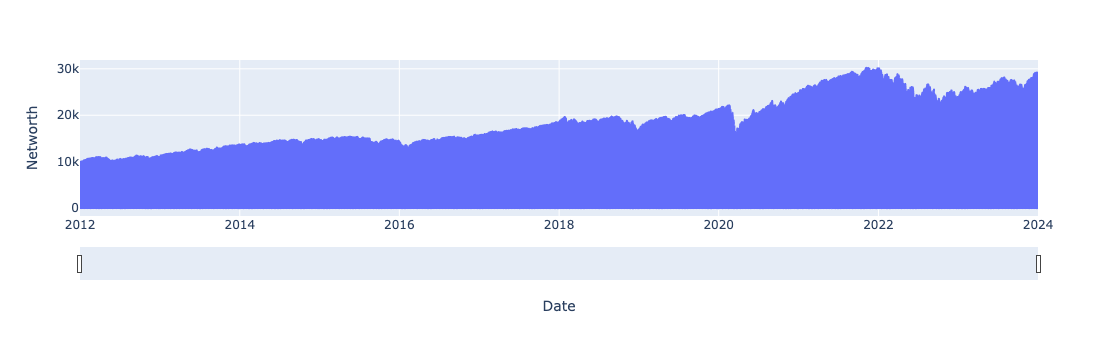

In [34]:
import plotly.express as px
lst = []
for key,val in portfolio['hist_values'].items():
    lst.append([key, val])
# print (lst)
df = pd.DataFrame(lst, columns =['Date', 'Networth'])
fig = px.line(df, x='Date', y="Networth")
fig.update_xaxes(rangeslider_visible=True)

fig.show()